In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

%matplotlib inline

In [18]:
output_dir = 'output_images'
os.makedirs(output_dir, exist_ok=True)

In [19]:
img = cv2.imread('cat.jpg', cv2.IMREAD_UNCHANGED)

print('shape:', img.shape)
print('dtype:', img.dtype)

shape: (682, 1024, 3)
dtype: uint8


In [20]:
if img.ndim == 2:
    channels = 1
else:
    channels = img.shape[2]
print('channels:', channels)

channels: 3


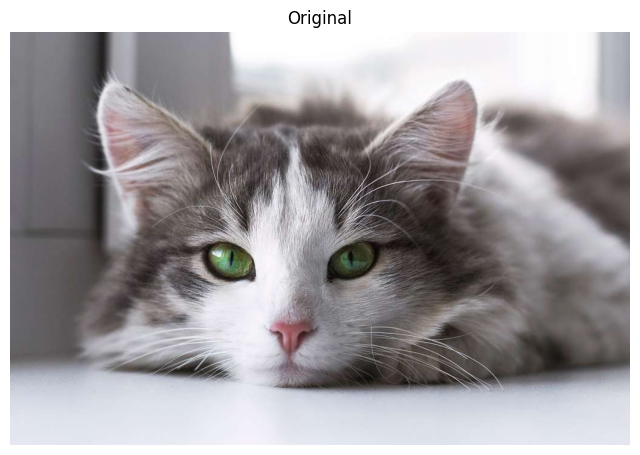

In [21]:
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original')
plt.show()

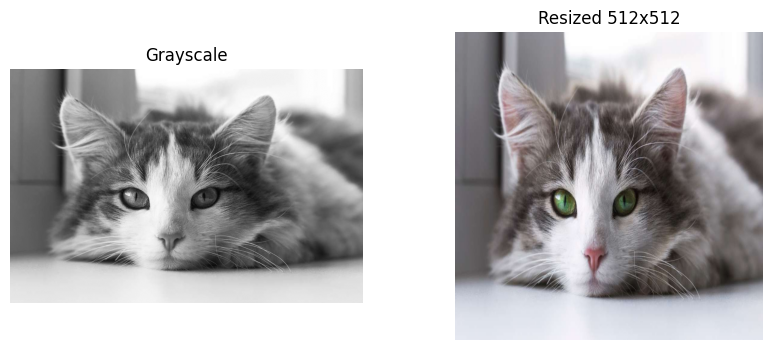

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim==3 else img.copy()
cv2.imwrite(os.path.join(output_dir, 'cat_gray.jpg'), gray)

resized = cv2.resize(img, (512, 512), interpolation=cv2.INTER_AREA)
cv2.imwrite(os.path.join(output_dir, 'cat_resized.png'), resized)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Resized 512x512')
plt.show()

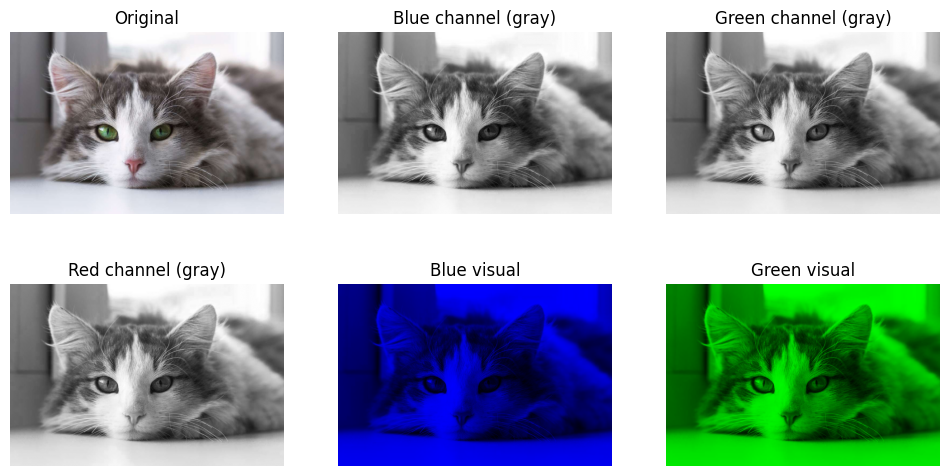

In [23]:
if img.ndim==3:
    b,g,r = cv2.split(img)
    zeros = np.zeros_like(b)

    b_col = cv2.merge([b,zeros,zeros])
    g_col = cv2.merge([zeros,g,zeros])
    r_col = cv2.merge([zeros,zeros,r])

    plt.figure(figsize=(12,6))
    plt.subplot(2,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Original')
    plt.subplot(2,3,2); plt.imshow(b, cmap='gray'); plt.axis('off'); plt.title('Blue channel (gray)')
    plt.subplot(2,3,3); plt.imshow(g, cmap='gray'); plt.axis('off'); plt.title('Green channel (gray)')
    plt.subplot(2,3,4); plt.imshow(r, cmap='gray'); plt.axis('off'); plt.title('Red channel (gray)')
    plt.subplot(2,3,5); plt.imshow(cv2.cvtColor(b_col, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Blue visual')
    plt.subplot(2,3,6); plt.imshow(cv2.cvtColor(g_col, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Green visual')
    plt.show()

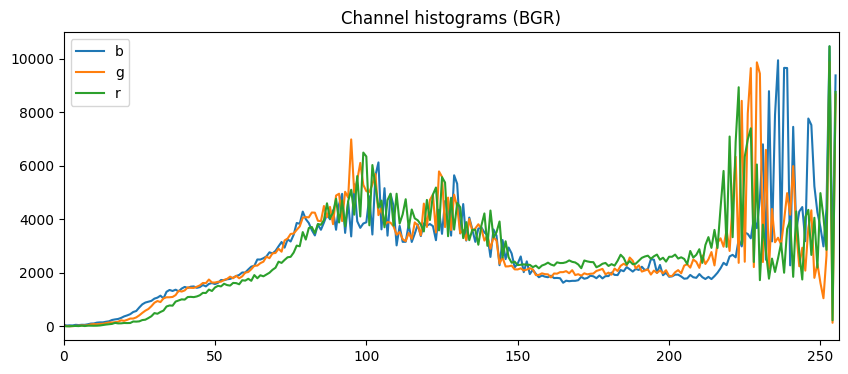

In [24]:
plt.figure(figsize=(10,4))

if img.ndim==3:
    color = ('b','g','r')

    for i,col in enumerate(color):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist, label=col)
        
    plt.legend()
    plt.title('Channel histograms (BGR)')
    plt.xlim([0,256])
    plt.show()
else:
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    plt.plot(hist); plt.title('Grayscale histogram'); plt.xlim([0,256]); plt.show()

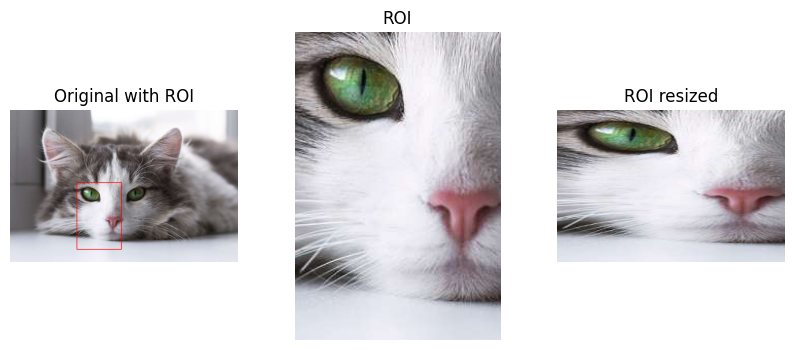

In [25]:
x1,x2 = 300,500
y1,y2 = 325,625

h,w = img.shape[:2]

x1,x2 = max(0,min(x1,w-1)), max(0,min(x2,w))
y1,y2 = max(0,min(y1,h-1)), max(0,min(y2,h))

roi = img[y1:y2, x1:x2].copy()
cv2.imwrite(os.path.join(output_dir, 'cat_roi.jpg'), roi)

roi_resized = cv2.resize(roi, (300,200), interpolation=cv2.INTER_CUBIC)
cv2.imwrite(os.path.join(output_dir, 'cat_roi_resized.jpg'), roi_resized)

img_rect = img.copy()

cv2.rectangle(img_rect, (x1,y1),(x2,y2),(0,0,255),2)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Original with ROI')
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('ROI')
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(roi_resized, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('ROI resized')
plt.show()


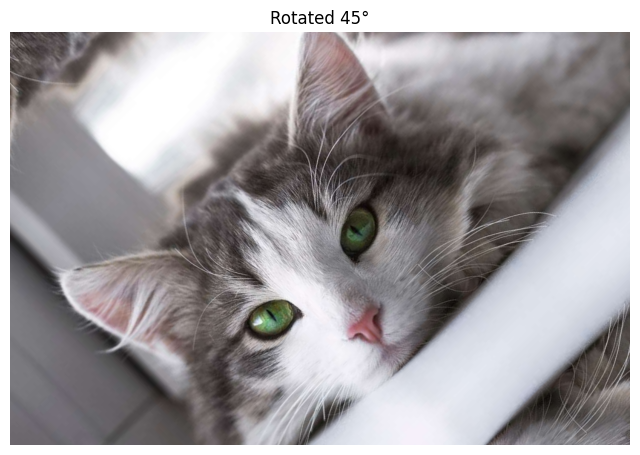

In [26]:
(h,w) = img.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)

rotated = cv2.warpAffine(img, M, (w,h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
cv2.imwrite(os.path.join(output_dir, 'cat_rotated_45.jpg'), rotated)
plt.figure(figsize=(8,6)); plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Rotated 45°'); plt.show()

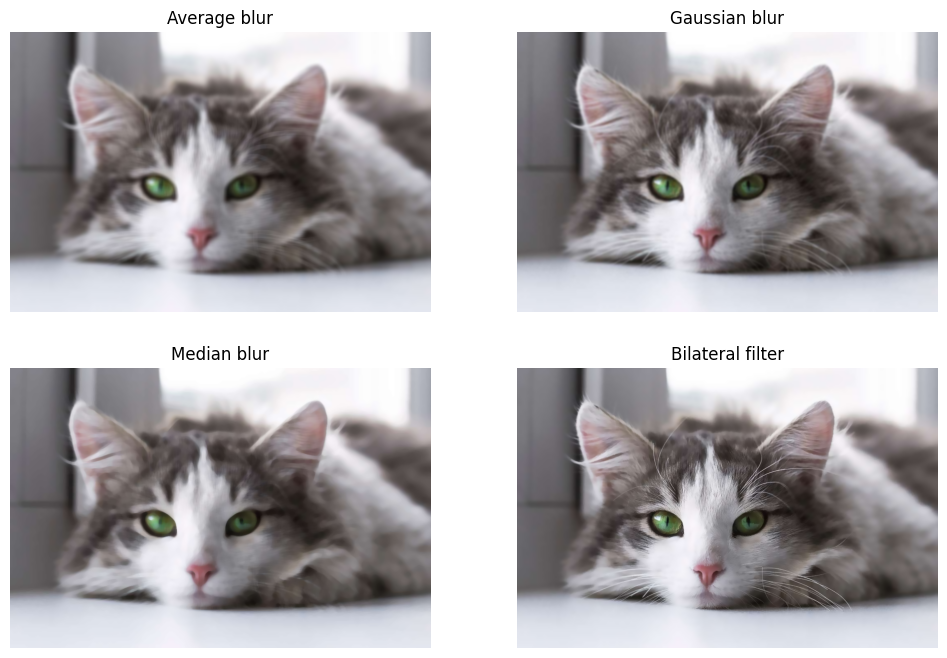

In [27]:
blur_avg = cv2.blur(img, (11,11))
blur_gauss = cv2.GaussianBlur(img, (11,11), 0)
blur_median = cv2.medianBlur(img, 11)
blur_bilat = cv2.bilateralFilter(img, 11, 35, 15)

cv2.imwrite(os.path.join(output_dir, 'cat_blur_avg.jpg'), blur_avg)
cv2.imwrite(os.path.join(output_dir, 'cat_blur_gauss.jpg'), blur_gauss)
cv2.imwrite(os.path.join(output_dir, 'cat_blur_median.jpg'), blur_median)
cv2.imwrite(os.path.join(output_dir, 'cat_blur_bilateral.jpg'), blur_bilat)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.imshow(cv2.cvtColor(blur_avg, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Average blur')
plt.subplot(2,2,2); plt.imshow(cv2.cvtColor(blur_gauss, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Gaussian blur')
plt.subplot(2,2,3); plt.imshow(cv2.cvtColor(blur_median, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Median blur')
plt.subplot(2,2,4); plt.imshow(cv2.cvtColor(blur_bilat, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Bilateral filter')
plt.show()

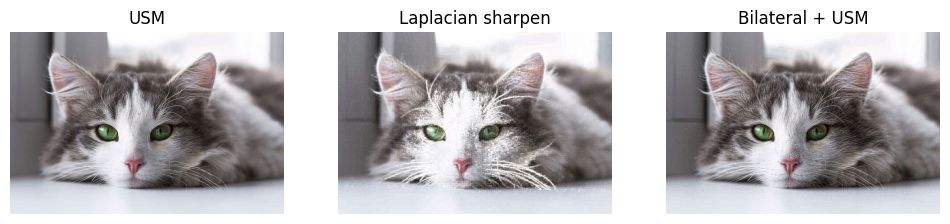

In [28]:
gauss_small = cv2.GaussianBlur(img, (3,3), 1)
usm = cv2.addWeighted(img, 3.6, gauss_small, -2.6, 0)
gray_for_lap = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lap = cv2.Laplacian(gray_for_lap, cv2.CV_16S, ksize=3)
lap_abs = cv2.convertScaleAbs(lap)
lap_bgr = cv2.cvtColor(lap_abs, cv2.COLOR_GRAY2BGR)
lap_sharp = cv2.addWeighted(img, 1.0, lap_bgr, 1.0, 0)
bilat_mask = cv2.bilateralFilter(img, 11, 35, 15)
usm_bilat = cv2.addWeighted(img, 3.6, bilat_mask, -2.6, 0)

cv2.imwrite(os.path.join(output_dir, 'cat_usm.jpg'), usm)
cv2.imwrite(os.path.join(output_dir, 'cat_lap_sharp.jpg'), lap_sharp)
cv2.imwrite(os.path.join(output_dir, 'cat_usm_bilat.jpg'), usm_bilat)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(usm, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('USM')
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(lap_sharp, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Laplacian sharpen')
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(usm_bilat, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title('Bilateral + USM')
plt.show()

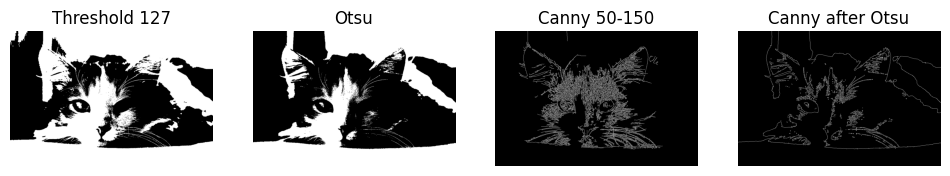

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim==3 else img.copy()
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
canny = cv2.Canny(gray, 50, 150)
ret_otsu, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
canny_after_thresh = cv2.Canny(thresh_otsu, 50, 150)

cv2.imwrite(os.path.join(output_dir, 'cat_thresh_127.jpg'), thresh)
cv2.imwrite(os.path.join(output_dir, 'cat_thresh_otsu.jpg'), thresh_otsu)
cv2.imwrite(os.path.join(output_dir, 'cat_canny.jpg'), canny)
cv2.imwrite(os.path.join(output_dir, 'cat_canny_after_thresh.jpg'), canny_after_thresh)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.imshow(thresh, cmap='gray'); plt.axis('off'); plt.title('Threshold 127')
plt.subplot(1,4,2); plt.imshow(thresh_otsu, cmap='gray'); plt.axis('off'); plt.title('Otsu')
plt.subplot(1,4,3); plt.imshow(canny, cmap='gray'); plt.axis('off'); plt.title('Canny 50-150')
plt.subplot(1,4,4); plt.imshow(canny_after_thresh, cmap='gray'); plt.axis('off'); plt.title('Canny after Otsu')
plt.show()

Матриця фільтра Sobel X:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


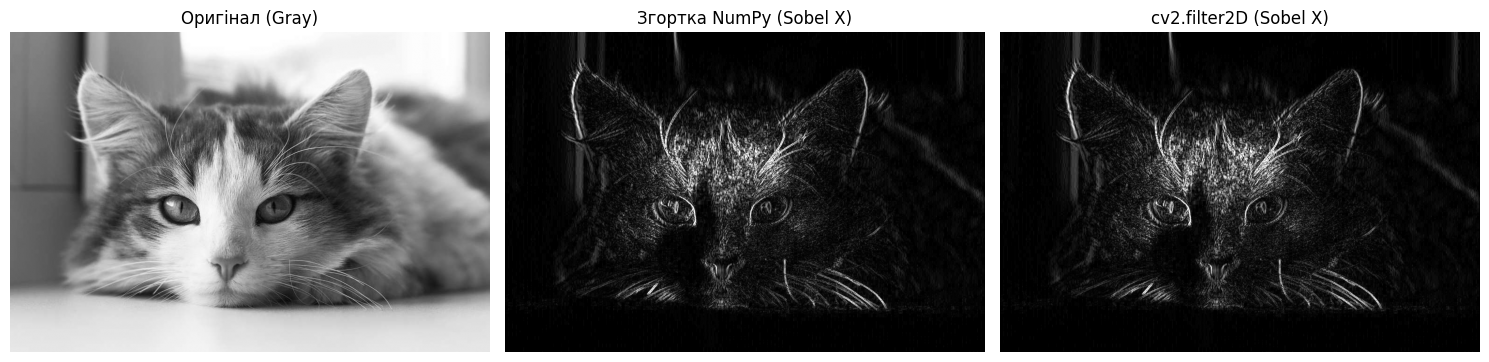

In [30]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

print("Матриця фільтра Sobel X:")
print(sobel_x)

gray_for_conv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img.copy()

def numpy_convolve2d(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
    output = np.zeros_like(image, dtype=np.float32)

    for y in range(h):
        for x in range(w):
            region = padded[y:y+kh, x:x+kw]
            output[y, x] = np.sum(region * kernel)

    output = np.clip(np.abs(output), 0, 255).astype(np.uint8)
    return output

custom_conv_result = numpy_convolve2d(gray_for_conv, sobel_x)

opencv_conv_result = cv2.filter2D(gray_for_conv, cv2.CV_32F, sobel_x)
opencv_conv_result = np.clip(np.abs(opencv_conv_result), 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_for_conv, cmap='gray')
plt.title('Оригінал (Gray)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(custom_conv_result, cmap='gray')
plt.title('Згортка NumPy (Sobel X)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opencv_conv_result, cmap='gray')
plt.title('cv2.filter2D (Sobel X)')
plt.axis('off')

plt.tight_layout()
plt.show()